In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


In [245]:
heart = pd.read_csv('/Users/jacikapatel/Desktop/Springboard/Heart Disease/heart.csv')

In [246]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [247]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [248]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [249]:
categorical_variables = [
    "sex", "cp", "fbs", "restecg",
    "exang", "slope", "ca", "thal", "target"
]

continuous_variables = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# Convert columns to 'object' type
heart[categorical_variables] = heart[categorical_variables].apply(lambda x: x.astype("object"))


In [250]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 33.3+ KB


In [251]:
heart.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [252]:
heart.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


In [253]:
sex_grouped = heart.groupby('sex').mean()
age_grouped = heart.groupby('age').mean()


In [254]:
sex_grouped

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.125,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.125,0.75
1,53.758454,0.932367,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966,0.449275


In [255]:
age_grouped

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
29,1.0,1.0,130.000000,204.000000,0.0,0.0,202.000000,0.0,0.000000,2.0,0.0,2.0,1.0
34,0.5,2.0,118.000000,196.000000,0.0,0.5,183.000000,0.0,0.350000,2.0,0.0,2.0,1.0
35,0.75,0.25,126.500000,213.750000,0.0,0.75,160.500000,0.5,0.750000,1.75,0.0,2.5,0.5
37,0.5,2.0,125.000000,232.500000,0.0,1.0,178.500000,0.0,1.750000,1.0,0.0,2.0,1.0
38,1.0,2.333333,132.000000,193.666667,0.0,1.0,176.000000,0.333333,1.266667,1.666667,2.666667,2.333333,0.666667
39,0.5,1.5,122.500000,239.750000,0.0,0.75,163.250000,0.0,0.300000,1.5,0.0,2.25,0.75
40,1.0,1.0,134.000000,196.333333,0.0,0.666667,157.666667,0.666667,1.133333,1.666667,0.0,3.0,0.333333
41,0.6,1.2,119.000000,220.700000,0.0,0.6,164.700000,0.1,0.340000,1.8,0.1,2.0,0.9
42,0.75,1.25,127.000000,246.750000,0.125,0.75,160.250000,0.125,0.500000,1.375,0.25,2.0,0.875


In [256]:
# There are 303 entries and 14 columns. 
# From the 14 paramters, 13 are intergers and 1 is in decimal. 
# Changed these variables: sex, cp, fbs, restecg, exang, slope, ca, thal, and target to object
# There are no null values
# grouped it by sex and age to see variation in data 



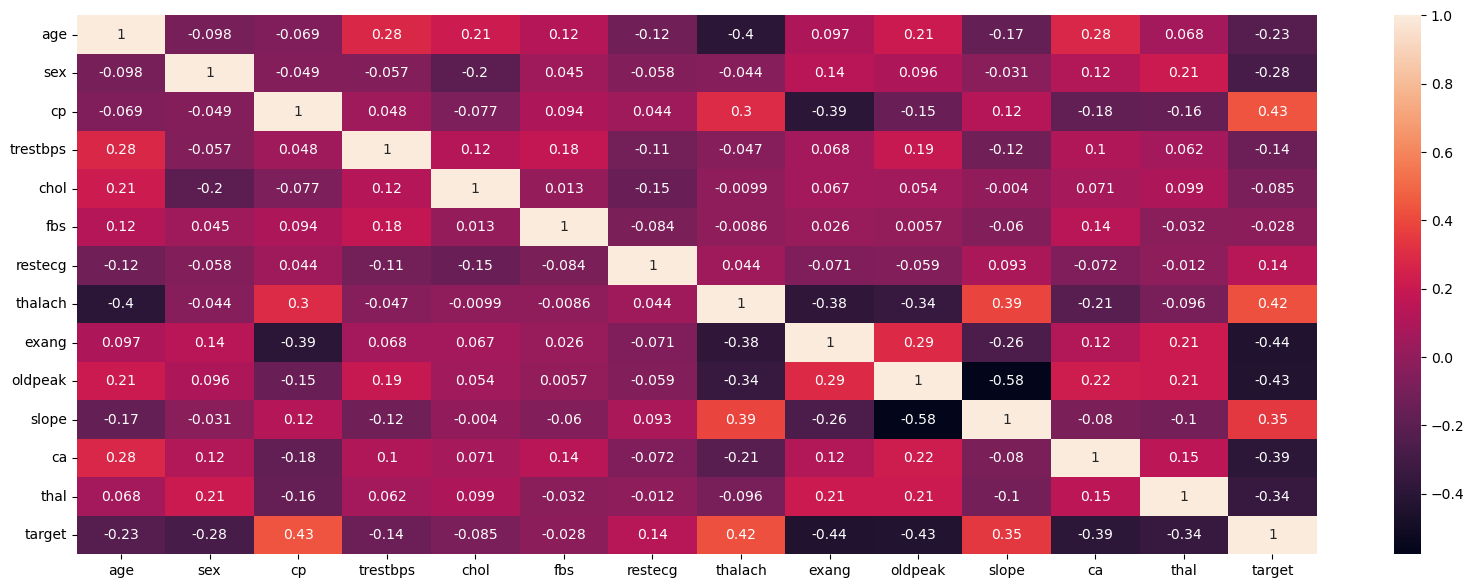

In [257]:
plt.figure(figsize=(20,7))
sns.heatmap(heart.corr(), annot=True)
plt.show()

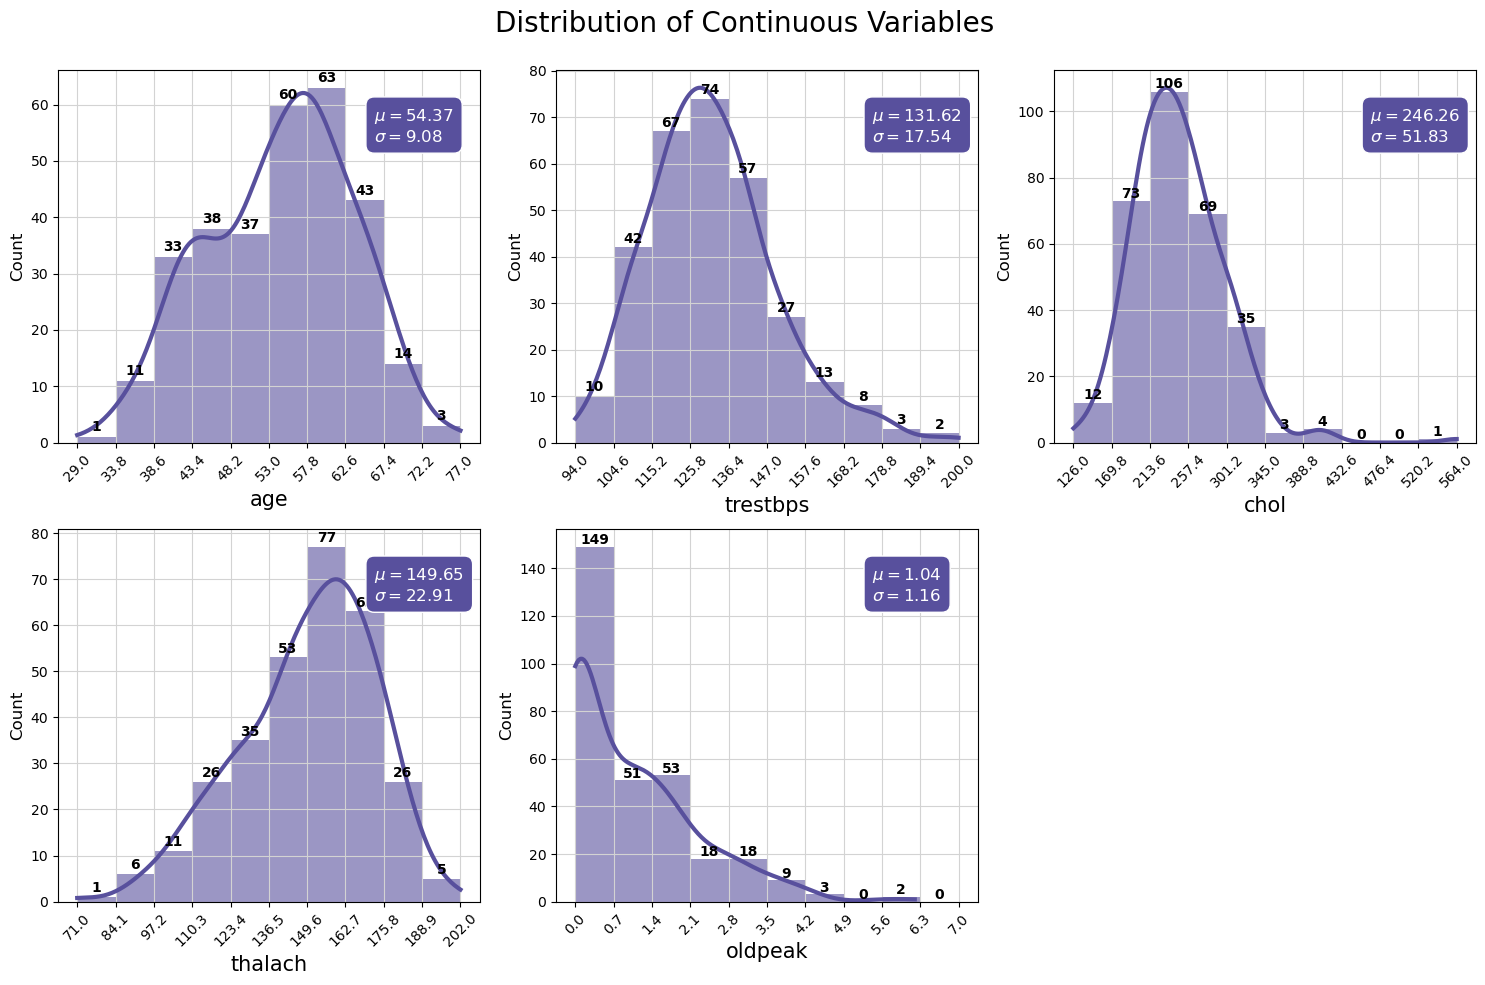

In [258]:
# Filter out continuous features for the univariate analysis
heart_continuous = heart[continuous_variables]

# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(heart_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(heart_continuous[col], 
                                     range=(np.floor(heart_continuous[col].min()), np.ceil(heart_continuous[col].max())))
    
    graph = sns.histplot(data=heart_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')
    
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")
    
    textstr = '\n'.join((
        r'$\mu=%.2f$' % heart_continuous[col].mean(),
        r'$\sigma=%.2f$' % heart_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [259]:
# Age: The age distribution is relatively even, with a peak in the late 50s. The average age is about 54.37 years, with a standard deviation of 9.08 years.

# Resting Blood Pressure (trestbps): Most individuals have resting blood pressure between 120-140 mm Hg. The average is around 131.62 mm Hg, with a standard deviation of 17.54 mm Hg.

# Serum Cholesterol (chol): Cholesterol levels generally fall between 200 and 300 mg/dl. The mean level is approximately 246.26 mg/dl, with a standard deviation of 51.83 mg/dl.

# Maximum Heart Rate Achieved (thalach): Most people reach a heart rate between 140 and 170 bpm during a stress test. The average maximum heart rate is about 149.65 bpm, with a standard deviation of 22.91 bpm.

# ST Depression Induced by Exercise (oldpeak): Values are mostly close to 0, indicating minimal ST depression during exercise for many. The mean ST depression is 1.04, with a standard deviation of 1.16.

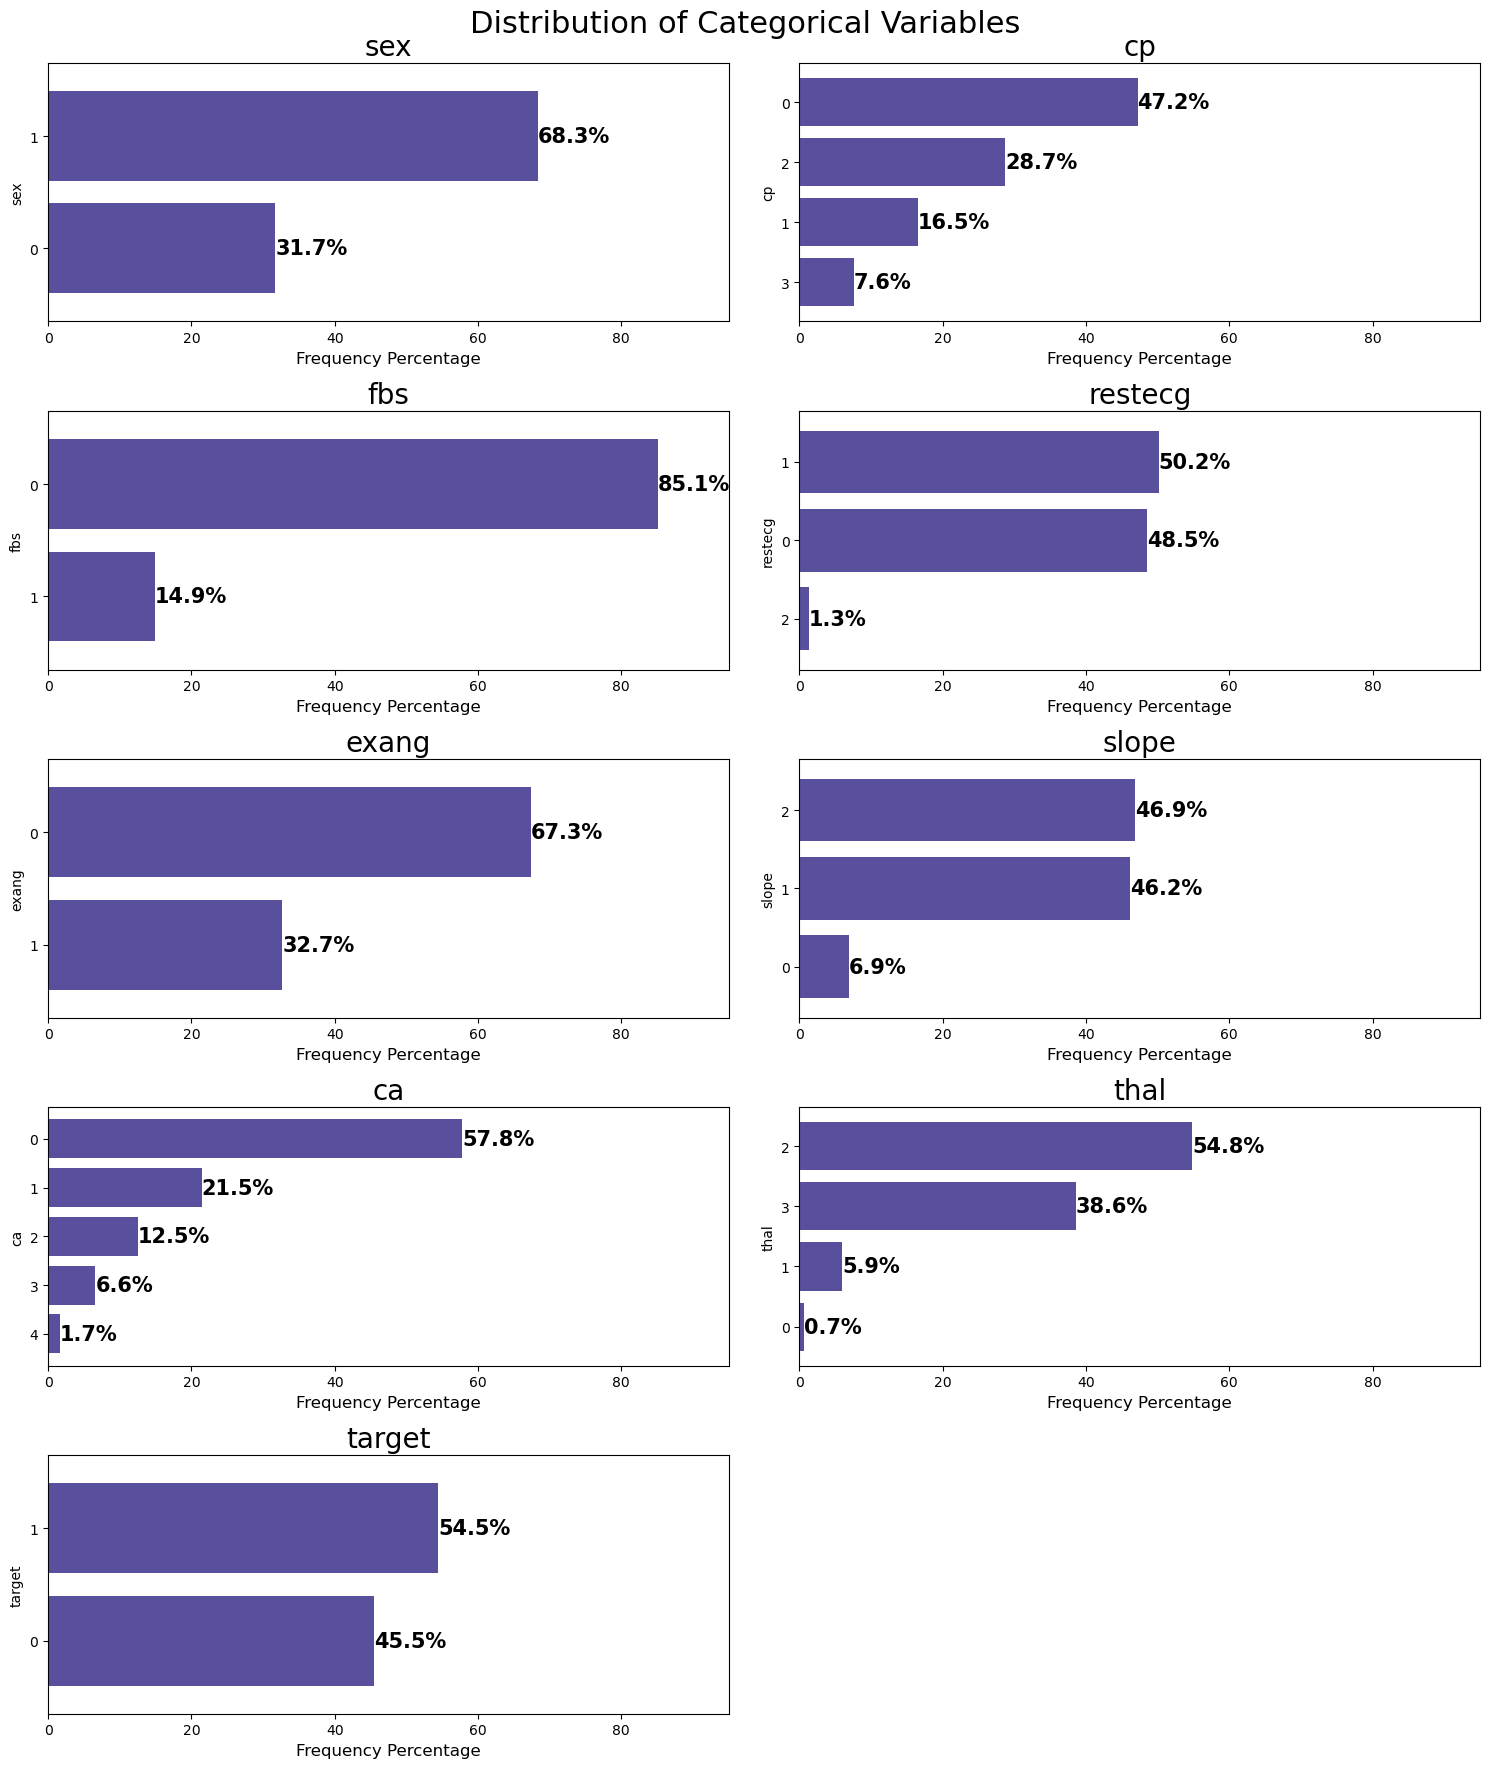

In [260]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

for i, col in enumerate(categorical_variables):
    row = i // 2
    col_idx = i % 2
    
    value_counts = heart[col].value_counts(normalize=True).mul(100).sort_values()
    
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8)
    
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')
    
    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[4,1].axis('off')
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [261]:
# Gender (sex): The dataset is moslty female participants.

# Type of Chest Pain (cp): The dataset includes various types of chest pain, with Type 0 (Typical angina) being the most common in this dataset. 

# Fasting Blood Sugar (fbs): Most patients have fasting blood sugar levels below 120 mg/dl, high fasting blood sugar is uncommon in this dataset.

# Resting Electrocardiographic Results (restecg): The results vary among patients, with certain types appearing more frequently

# Exercise-Induced Angina (exang): The majority of patients do not experience exercise-induced angina, it is not a common symptom in this dataset.

# Slope of the Peak Exercise ST Segment (slope): Flat and Downsloping are more common in this dataset.

# Number of Major Vessels Colored by Fluoroscopy (ca): Most patients have fewer major vessels colored by fluoroscopy, with '0' being the most frequent count.

# Thalium Stress Test Result (thal): Reversible defect is the most common, followed by not described in this dataset

#Presence of Heart Disease (target): The dataset approximately distributed evenly, with 54.5% of patients having heart disease and 45.5% not having it.


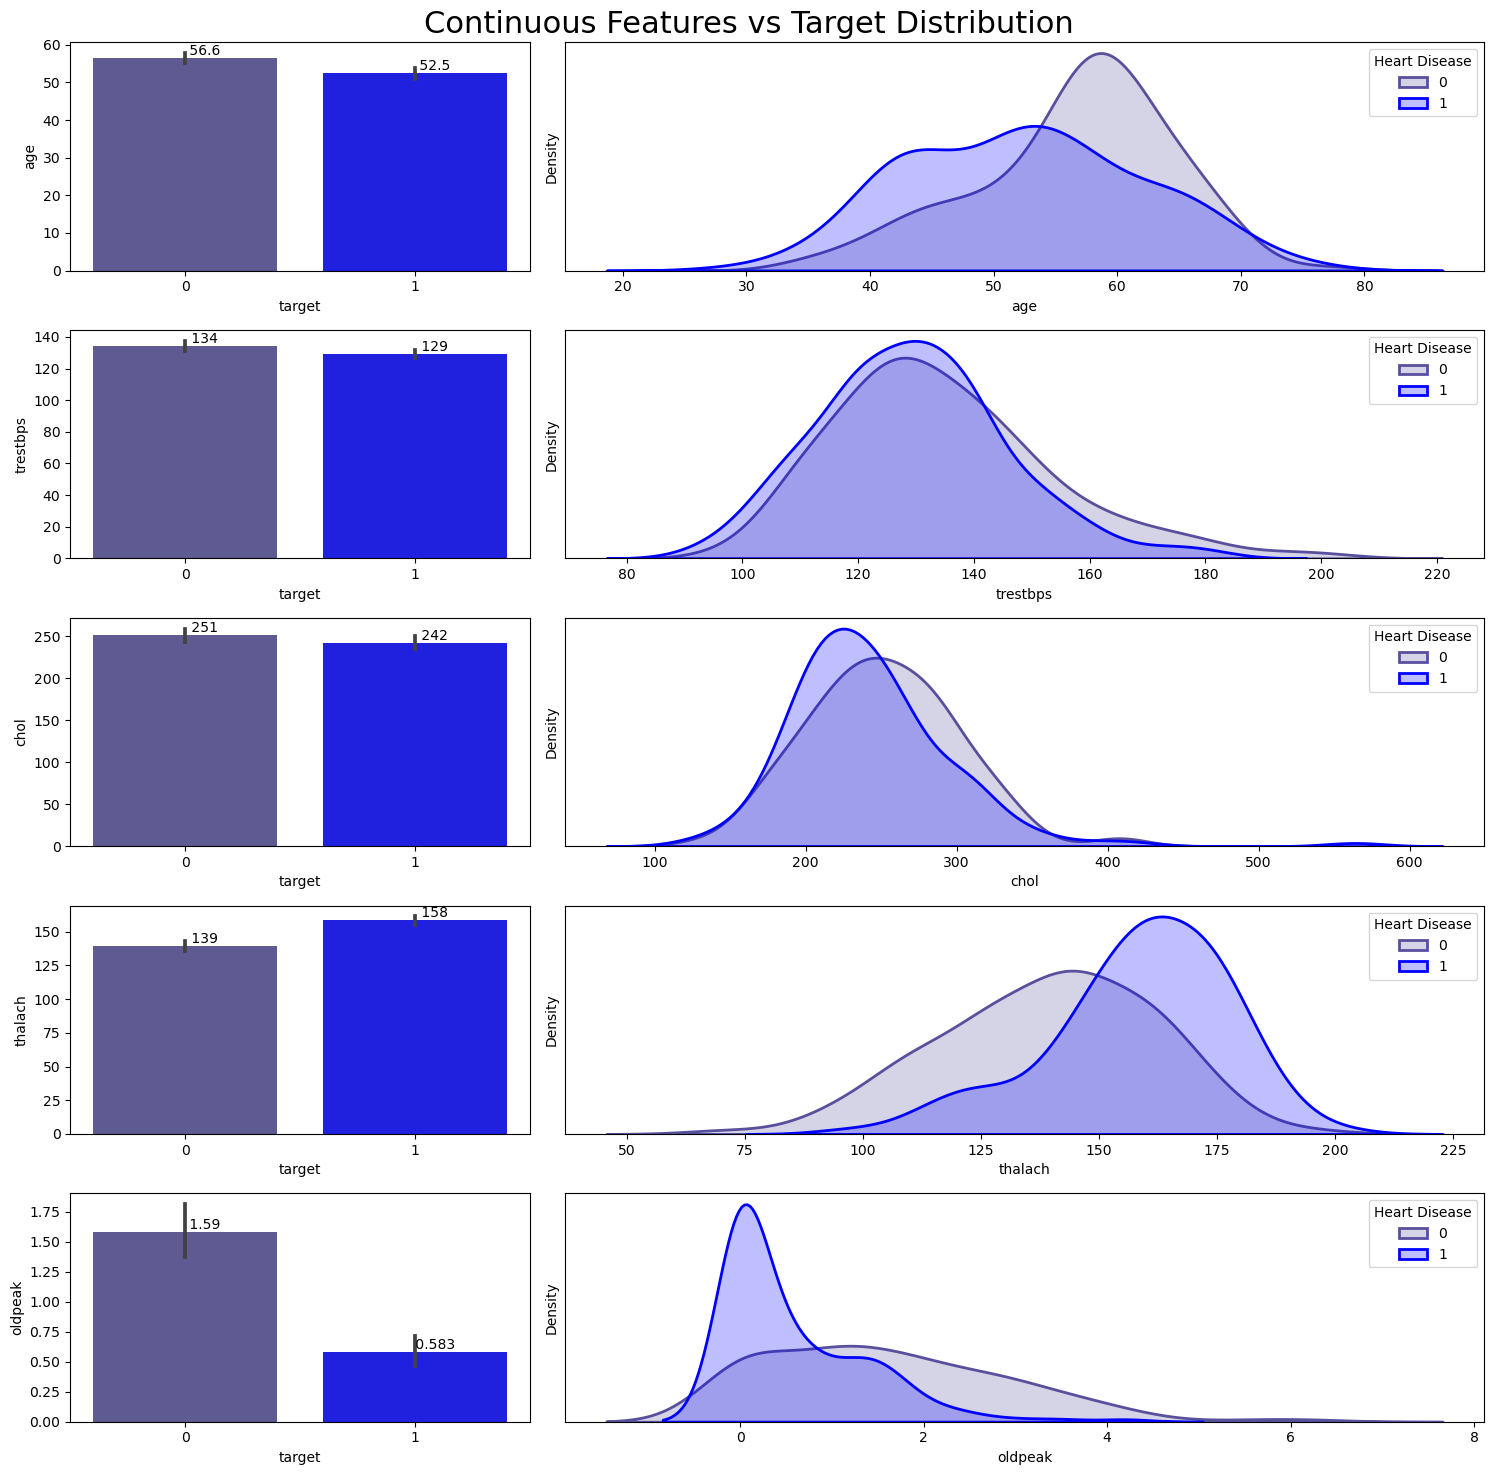

In [262]:
fig, ax = plt.subplots(len(continuous_variables), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

for i, col in enumerate(continuous_variables):
    graph = sns.barplot(data=heart, x="target", y=col, ax=ax[i,0])
    
    sns.kdeplot(data=heart[heart["target"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=heart[heart["target"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')
    
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()

    

In [263]:
#Maximum Heart Rate (thalach) seems to have the most impact on the heart disease status, followed by ST Depression (oldpeak) and Age (age).
